In [33]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<b>Data Description:</b><br>
Data Source:<br>
- This data is acquired from https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit?gid=1150341366#gid=1150341366 as .xlsx file and converted to data.csv file.<br>
- This dataset contains the following columns:<br>
1.	Id:	To count the records.<br>
2.	MSSubClass:	 Identifies the type of dwelling involved in the sale.<br>
3.	MSZoning:	Identifies the general zoning classification of the sale.<br>
4.	LotArea:	 Lot size in square feet.<br>
5.	LotConfig:	Configuration of the lot<br>
6.	BldgType:	Type of dwelling<br>
7.	OverallCond:	Rates the overall condition of the house<br>
8.	YearBuilt:	Original construction year<br>
9.	YearRemodAdd:	Remodel date (same as construction date if no remodeling or additions).<br>
11.	BsmtFinSF2:	Type 2 finished square feet.<br>
12.	TotalBsmtSF:	Total square feet of basement area<br>
13.	SalePrice:	To be predicted<br>
<b>Data Question:</b><br>
- What factors are significant in predciting sale price of houses? And what price is the house based on given factors's information?<br>
The response variable: SalePrice<br>
The possible predictors:  MSSubClass, MSZoning, LotArea, LotConfig, BldgType, OverallCond, YearBuilt, YearRemodAdd, BsmtFinSF2, TotalBsmtSF<br>


In [34]:
# Load and show the first 10 rows of the data to see data's structure
df = pd.read_csv('data.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [35]:
# Check data type of each variable an correct the data type
df.info()
# Count categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category', 'bool'])
print(f'Number of categorical columns: {len(categorical_columns.columns)}')
print(categorical_columns.columns)

# Count numeric columns:
numeric_columns = df.select_dtypes(include=['number'])
print(f'Number of numeric columns: {len(numeric_columns.columns)}')
print(numeric_columns.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
Number of categorical columns: 4
Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')
Number of numeric columns: 9
Index(['Id', 'MSSubClass', 'LotArea', 'Overall

- This dataset has 2919 entries and 13 columns.<br>
- That includes:
4 categorical variables: 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'<br>
9 numeric varibles: 'Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'

In [36]:
# Drop Id column
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Check data statistic of numeric variables
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [37]:
# Check missing/null values of data
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

- MSZoning has 4 null values<br>
- Exterior1st has 1 null values<br>
- BsmtFinSF2 has 1 null values<br>
- TotalBsmtSF has 1 null values<br>
- SalePrice has 1459 null values<br>

In [38]:
# Replace null values with mean values and remove duplicate rows if any in the dataset
df. drop_duplicates(inplace=True)

# Fill na for categorical variables
df['MSZoning'].fillna(df['MSZoning'].mode()[0], inplace = True)
df['Exterior1st'].fillna(df['Exterior1st'].mode()[0], inplace = True)

# Fill na for numeric variables
df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean(), inplace = True)
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean(), inplace = True)
df['SalePrice'].fillna(df['SalePrice'].mean(), inplace = True)
df.shape

(2911, 12)

After cleaning:<br>
- This dataset has 2911 entries and 12 columns.<br>
- That includes:
4 categorical variables: 'MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'<br>
9 numeric varibles: 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'

In [39]:
# Plot bar chart to see the distribution of each variable

# Plot categorical variables:
for col in categorical_columns:
    unique_values = df[col].unique()
    print(f'Values of {col}: ', unique_values)
    value_count = df[col].value_counts().reset_index()
    value_count.columns = ['Category', 'Count']
    plot = px.bar(value_count, x='Category', y='Count', title=f'{col} Category Distribution')
    pyo.iplot(plot)

Values of MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


Values of LotConfig:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


Values of BldgType:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']


Values of Exterior1st:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [40]:

# Plot Numerical Variables
numeric_columns = df.select_dtypes(include=['number'])
for col in numeric_columns:
    fig = px.histogram(df, x=col, nbins=30, title=f'Histogram of {col}')
    # Customize the appearance if needed
    fig.update_layout(
        xaxis_title=col,
        yaxis_title='Counts',
        bargap=0.1,  # Adjust the gap between bars
        title_x=0.5   # Center the title
    )
    pyo.iplot(fig)

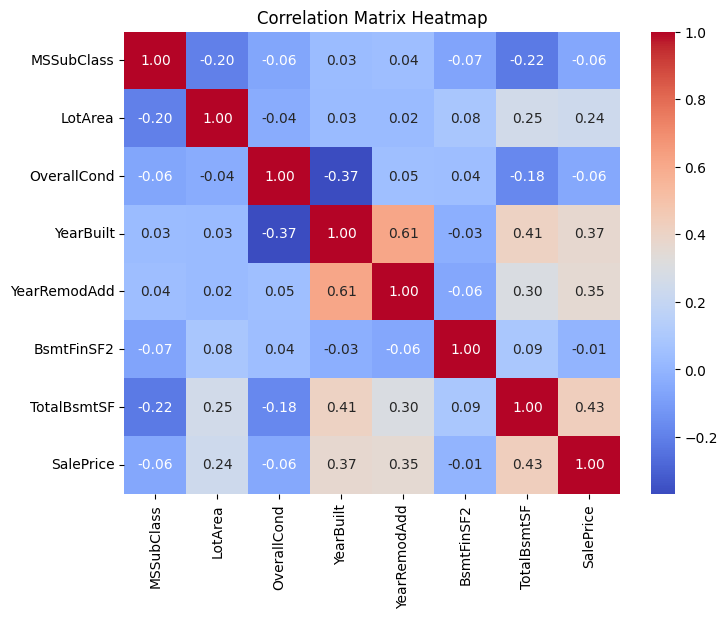

In [41]:
# Explore relationship between numerical variables

# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Compute the correlation matrix for the numerical columns
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Update layout for better readability
plt.title('Correlation Matrix Heatmap')
plt.show()

- TotalBsmtSF and SalePrice have a positive correlation (~0.43), indicating that as the total basement area increases, the sale price tends to increase.<br>
- YearBuilt, YearRemodAdd also show a positive correlation (0.35~0.37) with SalePrice, suggesting that newer houses tend to have higher sale prices.<br>
- OverallCond, MSSubclass have a slight negative correlation with SalePrice (-0.05~-0.06), meaning that the overall condition rating may slightly decrease as sale price increases, though the effect is very minimal.<br>
- LotArea and SalePrice have a correlation of 0.24 suggests that, in general, larger lot areas tend to be associated with higher sale prices. However, the relationship is not very strong, implying that other factors likely play a more significant role in determining the sale price of a property.

In [42]:
# Explore relationship between SalePrice and other categorical varialbe using correlation rattio

# Function to calculate the correlation ratio (η²)
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    
    for i in range(cat_num):
        cat_measures = measurements[fcat == i]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)
    
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    numerator = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    denominator = np.sum((measurements - y_total_avg) ** 2)
    
    if numerator == 0:
        return 0.0
    else:
        return np.sqrt(numerator / denominator)

# Calculate the correlation ratio for each categorical variable
for col in categorical_columns:
    # Ensure there are no missing values in the column and SalePrice
    eta_squared = correlation_ratio(df[col], df['SalePrice'].loc[df[col].index])
    print(f"Correlation Ratio (η²) for {col}: {eta_squared}")



Correlation Ratio (η²) for MSZoning: 0.22669722318599306
Correlation Ratio (η²) for LotConfig: 0.10523387811917098
Correlation Ratio (η²) for BldgType: 0.12899402011999697
Correlation Ratio (η²) for Exterior1st: 0.27626786820716165


•	η² between 0.1 and 0.3: There is a weak to moderate association between categorical variables (MSZoning,LotConfig, BldgType, Exterior1st) and numeric variables (SalePrice). The numeric values show some variation across categories, but the relationship is not strong.

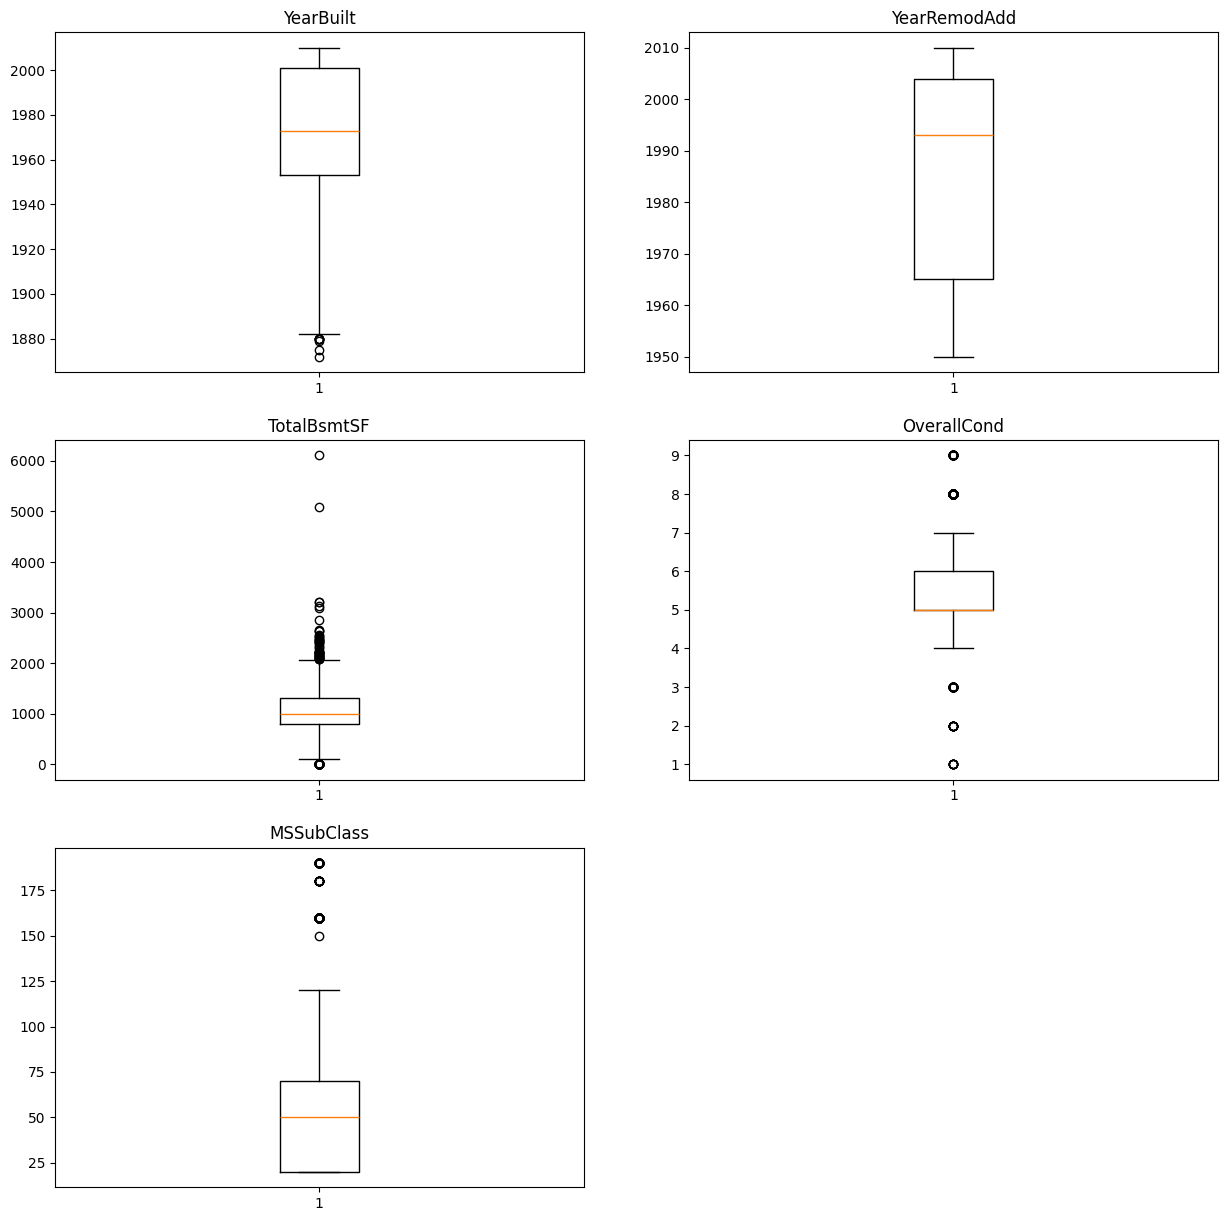

In [43]:
# Detect outliers using Boxplot
feature = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','OverallCond', 'MSSubClass']
plt.figure(figsize=(15,15))
for i,col in enumerate(feature):
    plt.subplot(3,2,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col}')
plt.show()

- The graph shows there are too some outliers in MSSubClass, OverallCond.

In [48]:
# Handle outliers using Z-score

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[['YearBuilt', 'TotalBsmtSF','OverallCond', 'MSSubClass']]))

# Set a threshold for Z-score (common choice is 3)
threshold = 2

# Identify outliers
outliers = np.where(z_scores > threshold)

# Remove outliers
df = df[(z_scores < threshold).all(axis=1)]

# Reset index
df = df.reset_index(drop=True)

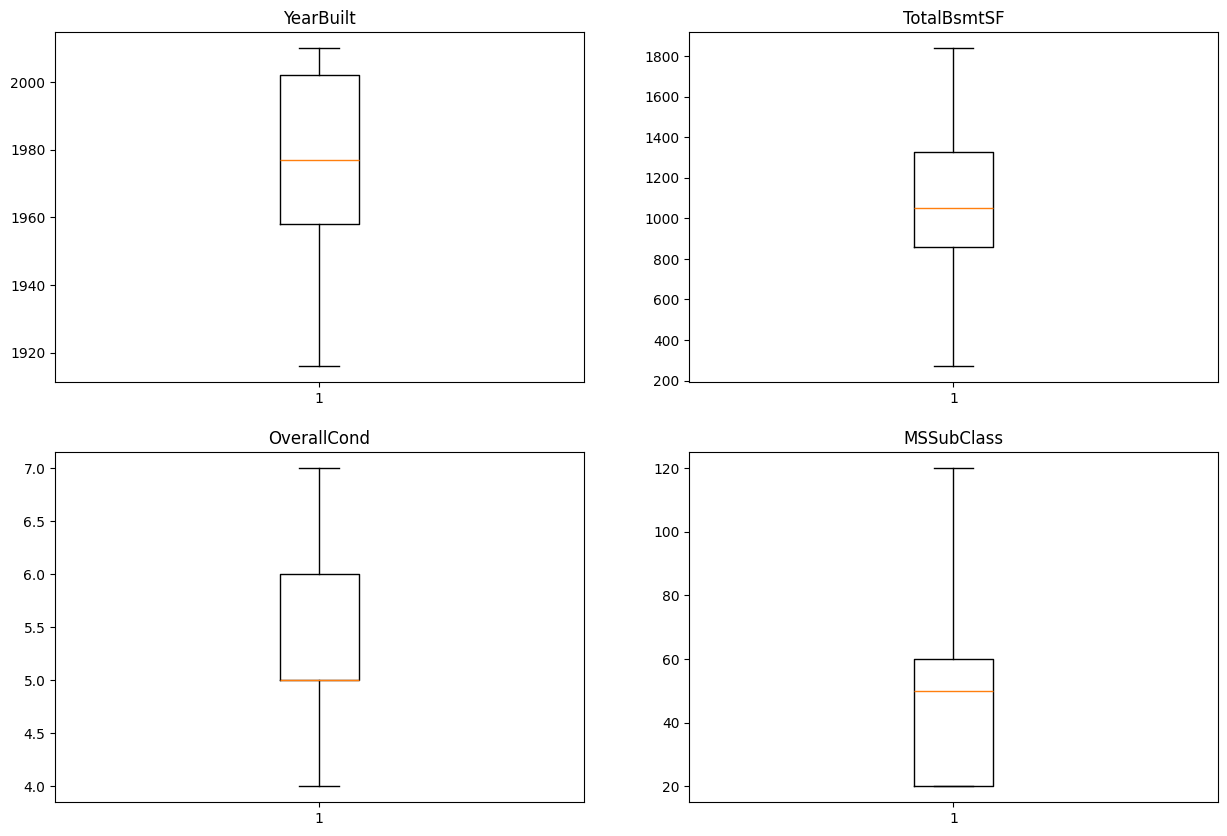

In [49]:
# Boxplot after handling outliers
feature = ['YearBuilt', 'TotalBsmtSF','OverallCond', 'MSSubClass']
plt.figure(figsize=(15,10))
for i,col in enumerate(feature):
    plt.subplot(2,2,i+1)
    plt.boxplot(df[col])
    plt.title(f'{col}')
plt.show()

All of the outliers are removed from the dataset.

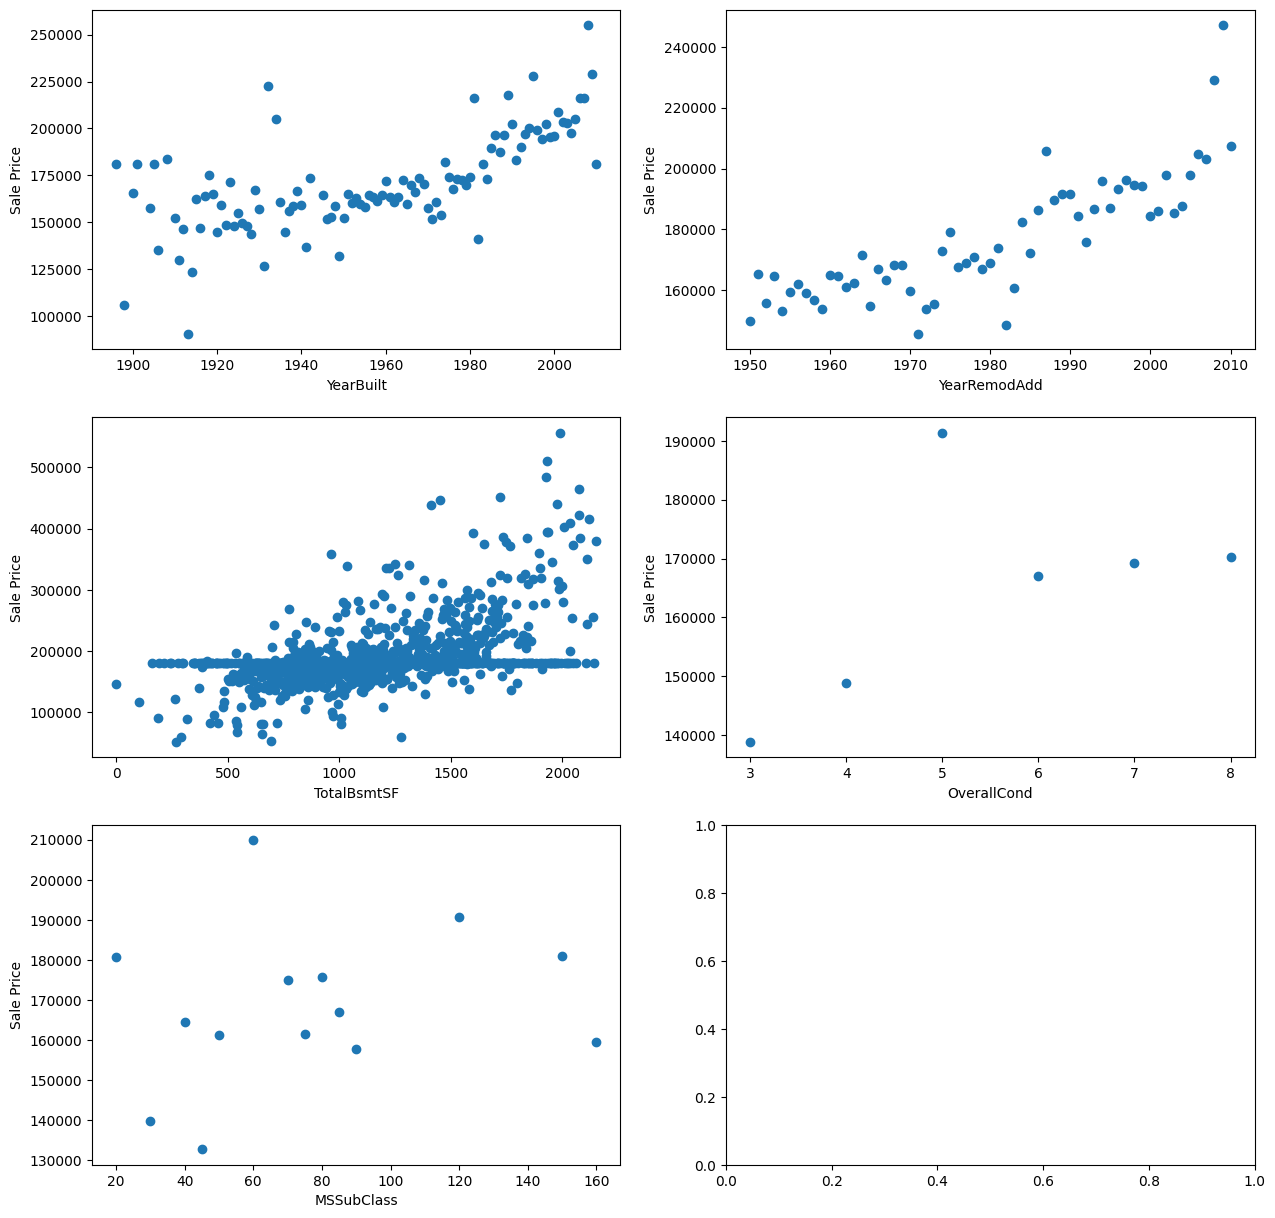

In [46]:
# Plot the graphs to see relationships between SalePrice and 5 significant variables
feature = ['YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','OverallCond', 'MSSubClass']
plt.subplots(3,2, figsize=(15,15))
for i, col in enumerate(feature):
    grouped_data = df.groupby(col)['SalePrice'].mean()
    plt.subplot(3,2,i+1)
    plt.scatter(grouped_data.index, grouped_data.values)
    plt.xlabel(f'{col}')
    plt.ylabel('Sale Price')
plt.show()

Based on the graphs, I decided to use linear models to build a ML model to predict the house's prices. 

In [47]:
# Build Linear Regression Model
X = df.drop(['SalePrice', 'MSZoning','LotArea','LotConfig', 'BldgType','Exterior1st','BsmtFinSF2','MSZoning','LotConfig', 'BldgType', 'Exterior1st'], axis= 1)
Y = df['SalePrice']
mse, r2 = [],[]
for i in range(10):
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=50)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)
    # Evaluate model
    mse.append(mean_squared_error(Y_test, Y_pred))
    r2.append(r2_score(Y_test, Y_pred))
print('Linear Regression Statistics:')
print("Mean Squared Error:", np.mean(mse))
print("R-squared:", np.mean(r2))
print("\n")

#
mse,r2 = [],[]
for i in range(10):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize the model
    regressor = DecisionTreeRegressor(random_state=42)

    # Train the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

print('Decision Tree statistics')
print(f'Mean Squared Error: {np.mean(mse)}')
print(f'R-squared: {np.mean(r2)}')
print('\n')
# K-Nearest Neighbors Regression
mse,r2 = [],[]
for i in range(10):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit the scaler on the training data and transform both training and test data
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize the model with n_neighbors = 5 (default)
    knn_regressor = KNeighborsRegressor(n_neighbors=5)

    # Train the model
    knn_regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model
    mse.append(mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

print('K-Nearest Neighbors Regression')
print(f'Mean Squared Error: {np.mean(mse)}')
print(f'R-squared: {np.mean(r2)}')

Linear Regression Statistics:
Mean Squared Error: 2132248724.558762
R-squared: 0.2718728297058809


Decision Tree statistics
Mean Squared Error: 3791611189.2024193
R-squared: -0.2652030420790206


K-Nearest Neighbors Regression
Mean Squared Error: 2041329657.4133973
R-squared: 0.3188393103701027


The statistics show that the Linear Regression and Decision Tree Model has low performance and needs to be polished or replaced by other linear models or non-linear models to improve prediction performance. K-Nearest Neighbors Regression has better performance but it is still low.